In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load data

In [2]:
df = pd.read_csv("../../../Data/mediacompany.csv")

In [3]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
df.drop("Unnamed: 7", axis=1, inplace=True)

In [5]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [6]:
df.shape

(80, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [8]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [10]:
d0 = pd.to_datetime(date(2017, 2, 28))
d1 = df["Date"]
delta = d1 - d0
df["day"] = delta
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [11]:
df["day"] = df["day"].astype(str).map(lambda x: x[0:2]).astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


# Exploratory Analysis

<Axes: xlabel='day'>

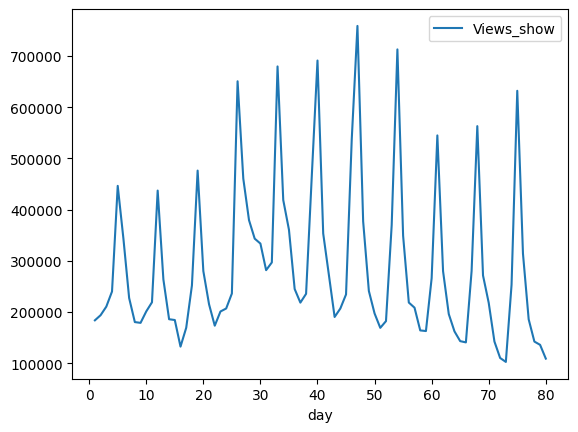

In [12]:
df.plot.line(x="day", y="Views_show")

C:\Users\Dell\AppData\Local\Temp\ipykernel_28940\15570376.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df.day, df.Views_show, s=area, c=colors, alpha=0.5)


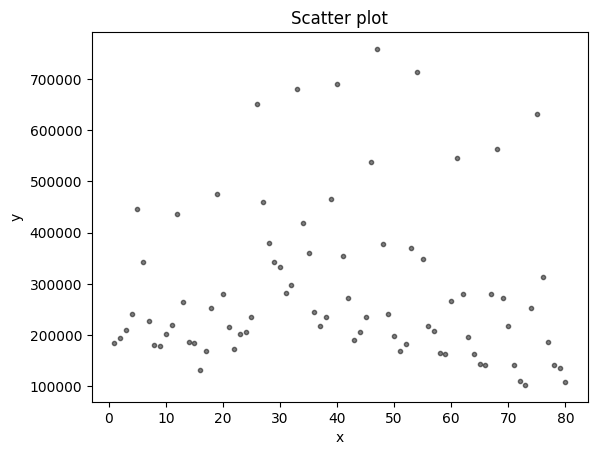

In [13]:
# Scatter Plot (days vs Views_show)
colors = (0, 0, 0)
area = np.pi * 3
plt.scatter(df.day, df.Views_show, s=area, c=colors, alpha=0.5)
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

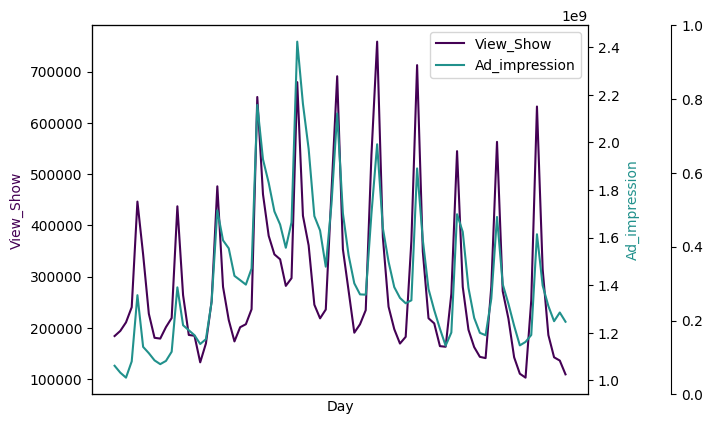

In [14]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)

(p1,) = host.plot(df.day, df.Views_show, color=color1, label="View_Show")
(p2,) = par1.plot(df.day, df.Ad_impression, color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc="best")

# right, left, top, bottom
par2.spines["right"].set_position(("outward", 60))
# no x-ticks
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
# par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

In [15]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
df["weekday"] = (df["day"] + 3) % 7
df.weekday.replace(0, 7, inplace=True)
df["weekday"] = df["weekday"].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Training

## V1

In [16]:
# Putting feature variable to X
X = df[["Visitors", "weekday"]]

# Putting response variable to y
y = df["Views_show"]

X.shape, y.shape

((80, 2), (80,))

In [17]:
model = LinearRegression()

In [18]:
model.fit(X, y)

LinearRegression()

In [19]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           8.01e-12
Time:                        11:41:47   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

## V2

In [20]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5:
        return 1
    elif i % 7 == 4:
        return 1
    else:
        return 0
    return i


df["weekend"] = [cond(i) for i in df["day"]]

In [21]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [22]:
# Putting feature variable to X
X = df[["Visitors", "weekend"]]

# Putting response variable to y
y = df["Views_show"]

In [23]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.51e-12
Time:                        11:41:47   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

## V3

In [24]:
# Putting feature variable to X
X = df[["Visitors", "weekend", "Character_A"]]

# Putting response variable to y
y = df["Views_show"]

In [25]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y, X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.53e-14
Time:                        11:41:47   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [26]:
# Create lag variable, previous day viewers affecting next day viewers
df["Lag_Views"] = np.roll(df["Views_show"], 1)
df.Lag_Views.replace(108961, 0, inplace=True)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


## V4

In [27]:
# Putting feature variable to X
X = df[["Visitors", "Character_A", "Lag_Views", "weekend"]]

# Putting response variable to y
y = df["Views_show"]

In [28]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y, X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.16e-21
Time:                        11:41:47   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

## V5

In [29]:
# Putting feature variable to X
X = df[["weekend", "Character_A", "Views_platform"]]

# Putting response variable to y
y = df["Views_show"]

In [30]:
X = sm.add_constant(X)
# create a fitted model in one line
lm_5 = sm.OLS(y, X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.59e-15
Time:                        11:41:47   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

## V6

In [31]:
# Putting feature variable to X
X = df[["weekend", "Character_A", "Visitors"]]

# Putting response variable to y
y = df["Views_show"]

X = sm.add_constant(X)
# create a fitted model in one line
lm_6 = sm.OLS(y, X).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.53e-14
Time:                        11:41:47   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

## V7

In [32]:
# Putting feature variable to X
X = df[["weekend", "Character_A", "Visitors", "Ad_impression"]]

# Putting response variable to y
y = df["Views_show"]

X = sm.add_constant(X)
# create a fitted model in one line
lm_7 = sm.OLS(y, X).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.10e-25
Time:                        11:41:47   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

## V8

In [33]:
# Putting feature variable to X
X = df[["weekend", "Character_A", "Ad_impression"]]

# Putting response variable to y
y = df["Views_show"]

X = sm.add_constant(X)
# create a fitted model in one line
lm_8 = sm.OLS(y, X).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.05e-26
Time:                        11:41:47   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

## V9

In [34]:
# Ad impression in million
df["ad_impression_million"] = df["Ad_impression"] / 1000000

In [35]:
# Putting feature variable to X
X = df[["weekend", "Character_A", "ad_impression_million", "Cricket_match_india"]]

# Putting response variable to y
y = df["Views_show"]

X = sm.add_constant(X)
# create a fitted model in one line
lm_9 = sm.OLS(y, X).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.02e-25
Time:                        11:41:47   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

## V10

In [36]:
# Putting feature variable to X
X = df[["weekend", "Character_A", "ad_impression_million"]]

# Putting response variable to y
y = df["Views_show"]

X = sm.add_constant(X)
# create a fitted model in one line
lm_10 = sm.OLS(y, X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           1.05e-26
Time:                        11:41:47   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

# Predictions & Evaluations

In [37]:
X = df[["weekend", "Character_A", "ad_impression_million"]]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [38]:
mean_squared_error(df.Views_show, Predicted_views)

4677651616.2534075

In [39]:
r2_score(df.Views_show, Predicted_views)

0.802643446857565

Text(0, 0.5, 'Views')

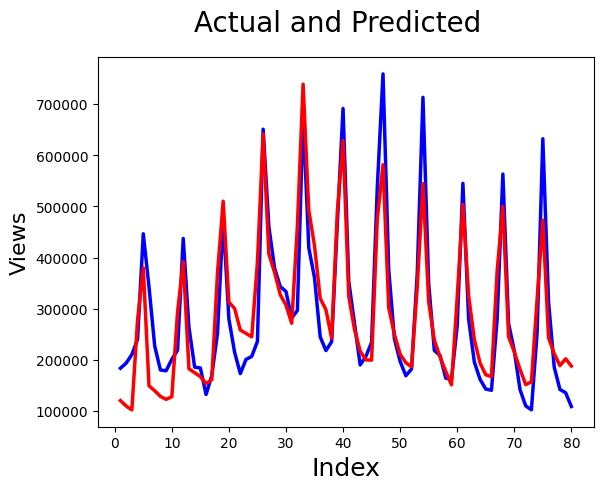

In [40]:
# Actual vs Predicted
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, df.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, Predicted_views, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual and Predicted", fontsize=20)  # Plot heading
plt.xlabel("Index", fontsize=18)  # X-label
plt.ylabel("Views", fontsize=16)  # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

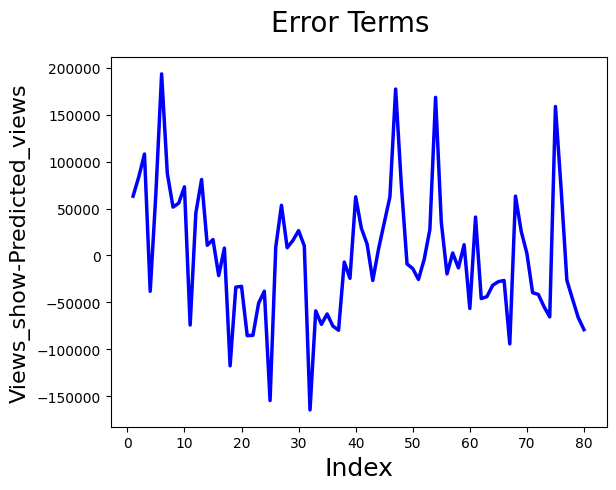

In [41]:
# Error terms
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, df.Views_show - Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=20)  # Plot heading
plt.xlabel("Index", fontsize=18)  # X-label
plt.ylabel("Views_show-Predicted_views", fontsize=16)  # Y-label